In [1]:
using Pkg
Pkg.add("ColorSchemes")

  Updating registry at `/opt/julia/registries/General`
 Resolving package versions...


┌ Warning: Some registries failed to update:
│     — `/opt/julia/registries/General` — registry dirty
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Pkg/src/Types.jl:1171


  Updating `/opt/julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]


In [2]:
script_start_time = time()
println("\nimporting packages...")

import Pkg
using Statistics
using LinearAlgebra
# using Eirene
using StatsBase
using JLD
using Plots
Pkg.add("ColorSchemes")
using ColorSchemes
using JSON
using Pkg
Pkg.add("StatsPlots")
Pkg.add("ColorSchemes")
using StatsPlots
using ColorSchemes

include("helper_functions.jl")
println("packages and functions imported")
printstyled("Elapsed time = $(time() - script_start_time) seconds \n \n", color = :yellow)


importing packages...
 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `/opt/julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.2/Manifest.toml`
 [no changes]


┌ Info: Recompiling stale cache file /opt/julia/compiled/v1.2/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1240


packages and functions imported
Elapsed time = 33.62977981567383 seconds 
 


In [3]:
### Set parameters

# Read from config file
config_file = "config091520.json"
config = read_config("$(homedir())/configs/$(config_file)")

# Parameters for all graphs
const NNODES = config["NNODES"]
const MAXDIM = config["MAXDIM"]
const NREPS = config["NREPS"]
const DATE_STRING = config["DATE_STRING"]


### Locate data and find nametags
read_dir = "$(homedir())/processed_data/results/$(NNODES)nodes"
betti_files = filter(x->occursin("bettiBars",x), readdir(read_dir))
betti_files = filter(x->occursin(DATE_STRING,x), betti_files)
println("Located the following graph files:")
for betti_file in betti_files
    println(betti_file)
end


# Locate the nametags
nametags = []
for betti_file in betti_files
    tag = split(split(betti_file, "$(DATE_STRING)_")[2], "_bettiBars")[1]
    nametags = [nametags; tag]
end

nametags = unique(nametags)

Located the following graph files:
IID_70nodes_50reps_091520_backward_bettiBars.jld
IID_70nodes_50reps_091520_forward_bettiBars.jld
IID_70nodes_50reps_091520_thresh02_edge483_noiseOnly_bettiBars.jld
IID_70nodes_50reps_091520_thresh02_edge483_threshold_bettiBars.jld
IID_70nodes_50reps_091520_thresh02_edge483_threshold_bettiBars_postnoise.jld
IID_70nodes_50reps_091520_thresh02_edge483_threshold_bettiBars_prenoise.jld
IID_70nodes_50reps_091520_thresh03_edge725_noiseOnly_bettiBars.jld
IID_70nodes_50reps_091520_thresh03_edge725_threshold_bettiBars.jld
IID_70nodes_50reps_091520_thresh03_edge725_threshold_bettiBars_postnoise.jld
IID_70nodes_50reps_091520_thresh03_edge725_threshold_bettiBars_prenoise.jld
IID_70nodes_50reps_091520_thresh04_edge966_noiseOnly_bettiBars.jld
IID_70nodes_50reps_091520_thresh04_edge966_threshold_bettiBars.jld
IID_70nodes_50reps_091520_thresh04_edge966_threshold_bettiBars_postnoise.jld
IID_70nodes_50reps_091520_thresh04_edge966_threshold_bettiBars_prenoise.jld
IID_70n

disassortative_70nodes_50reps_15_5_10_5_091520_thresh05_edge1208_threshold_bettiBars_prenoise.jld
disassortative_70nodes_50reps_15_5_10_5_091520_thresh06_edge1449_threshold_bettiBars.jld
disassortative_70nodes_50reps_15_5_10_5_091520_thresh06_edge1449_threshold_bettiBars_postnoise.jld
disassortative_70nodes_50reps_15_5_10_5_091520_thresh06_edge1449_threshold_bettiBars_prenoise.jld
disassortative_70nodes_50reps_15_5_10_5_091520_thresh07_edge1691_threshold_bettiBars.jld
disassortative_70nodes_50reps_15_5_10_5_091520_thresh07_edge1691_threshold_bettiBars_postnoise.jld
disassortative_70nodes_50reps_15_5_10_5_091520_thresh07_edge1691_threshold_bettiBars_prenoise.jld
disassortative_70nodes_50reps_15_5_10_5_091520_thresh08_edge1932_threshold_bettiBars.jld
disassortative_70nodes_50reps_15_5_10_5_091520_thresh08_edge1932_threshold_bettiBars_postnoise.jld
disassortative_70nodes_50reps_15_5_10_5_091520_thresh08_edge1932_threshold_bettiBars_prenoise.jld
discreteUniformConf_70nodes_50reps_0_1000_09

randomGeom_70nodes_50reps_3_091520_thresh07_edge1691_threshold_bettiBars.jld
randomGeom_70nodes_50reps_3_091520_thresh07_edge1691_threshold_bettiBars_postnoise.jld
randomGeom_70nodes_50reps_3_091520_thresh07_edge1691_threshold_bettiBars_prenoise.jld
randomGeom_70nodes_50reps_3_091520_thresh08_edge1932_threshold_bettiBars.jld
randomGeom_70nodes_50reps_3_091520_thresh08_edge1932_threshold_bettiBars_postnoise.jld
randomGeom_70nodes_50reps_3_091520_thresh08_edge1932_threshold_bettiBars_prenoise.jld
ringLattice_70nodes_50reps_091520_forward_bettiBars.jld
ringLattice_70nodes_50reps_091520_thresh02_edge483_threshold_bettiBars.jld
ringLattice_70nodes_50reps_091520_thresh02_edge483_threshold_bettiBars_postnoise.jld
ringLattice_70nodes_50reps_091520_thresh02_edge483_threshold_bettiBars_prenoise.jld
ringLattice_70nodes_50reps_091520_thresh03_edge725_threshold_bettiBars.jld
ringLattice_70nodes_50reps_091520_thresh03_edge725_threshold_bettiBars_postnoise.jld
ringLattice_70nodes_50reps_091520_thresh

16-element Array{Any,1}:
 "backward"                   
 "forward"                    
 "thresh02_edge483_noiseOnly" 
 "thresh02_edge483_threshold" 
 "thresh03_edge725_noiseOnly" 
 "thresh03_edge725_threshold" 
 "thresh04_edge966_noiseOnly" 
 "thresh04_edge966_threshold" 
 "thresh05_edge1208_noiseOnly"
 "thresh05_edge1208_threshold"
 "thresh06_edge1449_noiseOnly"
 "thresh06_edge1449_threshold"
 "thresh07_edge1691_noiseOnly"
 "thresh07_edge1691_threshold"
 "thresh08_edge1932_noiseOnly"
 "thresh08_edge1932_threshold"

In [4]:
for nametag in nametags
    
    ## Create one large plot with all of the betti curves
    betti_files_nametag = filter(x -> occursin("$(nametag)",x), betti_files)
    model_names = [split(betti_file_nametag,"_")[1] for betti_file_nametag in betti_files_nametag]
  

    ### Create one large plot with all of the betti curves
    nModels = length(betti_files_nametag)
    nEdges = binomial(NNODES, 2)
    bettiBarAll = zeros(NREPS, MAXDIM, nModels)
    muBarAll = zeros(NREPS, MAXDIM, nModels)
    nuBarAll = zeros(NREPS, MAXDIM, nModels)
    
    for (i,betti_file_nametag) in enumerate(betti_files_nametag)

        # Read in Betti curves
        bettiBar_dict = load("$(read_dir)/$(betti_file_nametag)")
        bettiBarAll[:,:, i] = bettiBar_dict["bettiBarArray"]
        muBarAll[:,:, i] = bettiBar_dict["muBarArray"]
        nuBarAll[:,:, i] = bettiBar_dict["nuBarArray"]

    end


    println("$(nametag) Size bettiBarAll is $(size(bettiBarAll))")



    # Plot
    p1a = violin(bettiBarAll[:,1,:],
        legend = false, alpha = 0.4, title = "dim 1")
    p1b = violin(bettiBarAll[:,2,:],
        legend = false, alpha = 0.4, title = "dim 2")
    p1c = violin(bettiBarAll[:,3,:],
        legend = false, alpha = 0.4, title = "dim 3")
    xlabel!("graphs")
    ylabel!("BettiBar")

    plot(p1a, p1b, p1c, layout = (3,1))

    savefig("../figures/all_bettiBars_$(nametag).pdf")


    p2a = violin(muBarAll[:,1,:],
        legend = false, alpha = 0.4, title = "dim 1")
    p2b = violin(muBarAll[:,2,:],
        legend = false, alpha = 0.4, title = "dim 2")
    p2c = violin(muBarAll[:,3,:],
        legend = false, alpha = 0.4, title = "dim 3")
    xlabel!("graphs")
    ylabel!("muBar")

    plot(p2a, p2b, p2c, layout = (3,1))

    savefig("../figures/all_muBars_$(nametag).pdf")


    p3a = violin(nuBarAll[:,1,:],
        legend = false, alpha = 0.4, title = "dim 1")
    p3b = violin(nuBarAll[:,2,:],
        legend = false, alpha = 0.4, title = "dim 2")
    p3c = violin(nuBarAll[:,3,:],
        legend = false, alpha = 0.4, title = "dim 3")
    xlabel!("graphs")
    ylabel!("muBar")

    plot(p3a, p3b, p3c, layout = (3,1))

    savefig("$(homedir())/figures/all_nuBars_$(nametag).pdf")

end

backward Size bettiBarAll is (50, 4, 9)
forward Size bettiBarAll is (50, 4, 10)
thresh02_edge483_threshold Size bettiBarAll is (50, 4, 30)
thresh03_edge725_threshold Size bettiBarAll is (50, 4, 30)
thresh04_edge966_threshold Size bettiBarAll is (50, 4, 30)
thresh05_edge1208_threshold Size bettiBarAll is (50, 4, 30)
thresh06_edge1449_threshold Size bettiBarAll is (50, 4, 30)
thresh07_edge1691_threshold Size bettiBarAll is (50, 4, 30)
thresh08_edge1932_threshold Size bettiBarAll is (50, 4, 30)


In [4]:
#### Make some cool plots of how the betti bar vals change
# Maybe just betti bar first

# Filter to just the thresholds
thresh_files = filter(x->occursin("thresh",x), betti_files)

# Locate the thresh nametages
thresh_nametags = []
for thresh_file in thresh_files
    tag = split(split(thresh_file, "$(DATE_STRING)_")[2], "_bettiBars")[1]
    thresh_nametags = [thresh_nametags; tag]
end

thresh_nametags = unique(thresh_nametags)

## And locate the model names
model_names = []
for thresh_file in thresh_files
    name = split(thresh_file, "_thresh")[1]
    model_names = [model_names; name]
end

model_names = unique(model_names)



11-element Array{Any,1}:
 "IID_70nodes_50reps_091520"                       
 "assortative_70nodes_50reps_15_5_10_5_091520"     
 "coreperiphery_70nodes_50reps_15_5_10_5_091520"   
 "cosineGeometric_70nodes_50reps_3_091520"         
 "disassortative_70nodes_50reps_15_5_10_5_091520"  
 "discreteUniformConf_70nodes_50reps_0_1000_091520"
 "dotProduct_70nodes_50reps_3_091520"              
 "geometricConf_70nodes_50reps_001_100_091520"     
 "probTriangle0_70nodes_50reps_0_091520"           
 "randomGeom_70nodes_50reps_3_091520"              
 "ringLattice_70nodes_50reps_091520"               

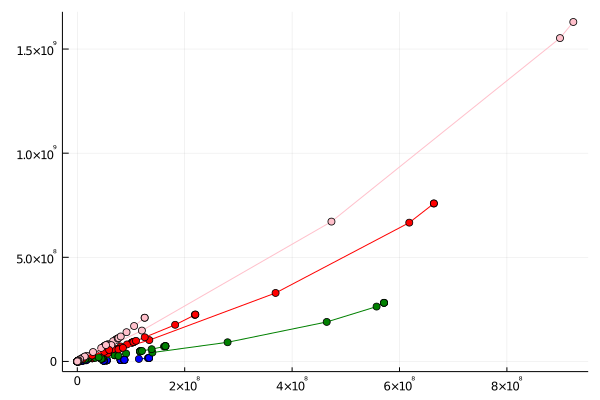

In [15]:
#### Loop over the model names and make plots

mean_bettiBar_all = zeros(length(model_names), MAXDIM, length(thresh_nametags))
mean_muBar_all = zeros(length(model_names), MAXDIM, length(thresh_nametags))
mean_nuBar_all = zeros(length(model_names), MAXDIM, length(thresh_nametags))
rho_vec = []
colors = [:blue, :green, :red, :pink]

for (j,model_name) in enumerate(model_names)

    model = split(model_name, "_")[1]
    # Loop through threshold vals and create vector of means and begin plotting
#     mean_vec = zeros(1, length(thresh_nametags))
    bettiBarAll = zeros(NREPS, MAXDIM, length(thresh_nametags))
    muBarAll = zeros(NREPS, MAXDIM, length(thresh_nametags))
    nuBarAll = zeros(NREPS, MAXDIM, length(thresh_nametags))

    p1a = plot()

    rho_vec = []
    
    for (i,thresh_nametag) in enumerate(thresh_nametags)
        
        # Load data
        bettiBar_dict = load("$(read_dir)/$(model_name)_$(thresh_nametag)_bettiBars.jld")
        bettiBarAll[:,:, i] = bettiBar_dict["bettiBarArray"]
    
        rho = split(split(thresh_nametag, "thresh")[2], "_")[1]

        rho = replace(rho, "0" => "0.")

        rho = parse(Float64, rho)
        rho_vec = [rho_vec; rho]
    
    
#         for dim in collect(1:MAXDIM)
#             violin!(bettiBarAll[:,dim, i],legend = false, alpha = 0.4, title = "dim 3", c=colors[dim])
#         end
    
    
        muBarAll[:,:, i] = bettiBar_dict["muBarArray"]
        nuBarAll[:,:, i] = bettiBar_dict["nuBarArray"]
    end

     # Now add the lines connecting the means
    mean_bettiBar = dropdims(mean(bettiBarAll, dims=1), dims=1)
    mean_muBar = dropdims(mean(muBarAll, dims=1), dims=1)
    mean_nuBar = dropdims(mean(nuBarAll, dims=1), dims=1)

    for dim in collect(1:MAXDIM)
        plot!(rho_vec, mean_bettiBar[dim, :], c=colors[dim], m = :dot)
    end
    xlabel!("Threshold")
    ylabel!("BettiBar")
    title!("$(model)")


    p1b = plot()
    for dim in collect(1:MAXDIM)
        plot!(rho_vec, mean_muBar[dim, :], c=colors[dim], m = :dot)
    end
    xlabel!("Threshold")
    ylabel!("muBar")
    title!("$(model)")


    p1c = plot()
    for dim in collect(1:MAXDIM)
        plot!(rho_vec, mean_nuBar[dim, :], c=colors[dim], m = :dot)
    end
    xlabel!("Threshold")
    ylabel!("nuBar")
    title!("$(model)")
    
    mean_bettiBar_all[j,:,:] = mean_bettiBar
    mean_muBar_all[j,:,:] = mean_muBar
    mean_nuBar_all[j,:,:] = mean_nuBar

    

    plot(p1a, p1b, p1c, layout =(3,1), size = (400,1100))
    savefig("$(homedir())/figures/$(model)_barsAcrossThresh_$(DATE_STRING).pdf")
end

# p2 = plot()
# for (j, model_name) in  enumerate(model_names)
#     for dim in collect(1:MAXDIM)
#         plot!(mean_nuBar_all[j,dim,:,], mean_muBar_all[j,dim,:], c=colors[dim], legend = false, m=:dot)
#     end
# end
# p2


In [21]:
#### Loop over the model names and make plots

mean_bettiBar_all = zeros(length(model_names), MAXDIM, length(thresh_nametags))
mean_muBar_all = zeros(length(model_names), MAXDIM, length(thresh_nametags))
mean_nuBar_all = zeros(length(model_names), MAXDIM, length(thresh_nametags))
rho_vec = []
colors = [:blue, :green, :red, :pink]



for (j,model_name) in enumerate(model_names)

    model = split(model_name, "_")[1]
    # Loop through threshold vals and create vector of means and begin plotting
#     mean_vec = zeros(1, length(thresh_nametags))
    bettiBarAll = zeros(NREPS, MAXDIM, length(thresh_nametags))
    muBarAll = zeros(NREPS, MAXDIM, length(thresh_nametags))
    nuBarAll = zeros(NREPS, MAXDIM, length(thresh_nametags))

    bettiBarAll_iid = zeros(NREPS, MAXDIM, length(thresh_nametags))
    muBarAll_iid = zeros(NREPS, MAXDIM, length(thresh_nametags))
    nuBarAll_iid = zeros(NREPS, MAXDIM, length(thresh_nametags))
    
    p1a = plot()

    rho_vec = []
    
    for (i,thresh_nametag) in enumerate(thresh_nametags)
        
        # Load data
        bettiBar_dict = load("$(read_dir)/$(model_name)_$(thresh_nametag)_bettiBars.jld")
        bettiBarAll[:,:, i] = bettiBar_dict["bettiBarArray"]
    
        rho = split(split(thresh_nametag, "thresh")[2], "_")[1]

        rho = replace(rho, "0" => "0.")

        rho = parse(Float64, rho)
        rho_vec = [rho_vec; rho]
    
        muBarAll[:,:, i] = bettiBar_dict["muBarArray"]
        nuBarAll[:,:, i] = bettiBar_dict["nuBarArray"]
        
        iid_dict = load("$(read_dir)/IID_70nodes_50reps_$(DATE_STRING)_$(thresh_nametag)_bettiBars.jld")
        bettiBarAll_iid[:,:, i] = iid_dict["bettiBarArray"]
        muBarAll_iid[:,:, i] = iid_dict["muBarArray"]
        nuBarAll_iid[:,:, i] = iid_dict["nuBarArray"]
    end

     # Now add the lines connecting the means
    mean_bettiBar = dropdims(mean(bettiBarAll, dims=1), dims=1)
    mean_muBar = dropdims(mean(muBarAll, dims=1), dims=1)
    mean_nuBar = dropdims(mean(nuBarAll, dims=1), dims=1)
    
    mean_bettiBar_iid = dropdims(mean(bettiBarAll_iid, dims=1), dims=1)
    mean_muBar_iid = dropdims(mean(muBarAll_iid, dims=1), dims=1)
    mean_nuBar_iid = dropdims(mean(nuBarAll_iid, dims=1), dims=1)

    for dim in collect(1:MAXDIM)
        plot!(rho_vec, mean_bettiBar[dim, :]./mean_bettiBar_iid[dim,:], c=colors[dim], m = :dot, legend =false)
    end
    xlabel!("Threshold")
    ylabel!("BettiBar")
    title!("$(model)")
    yaxis!([0,1])


    p1b = plot()
    for dim in collect(1:MAXDIM)
        plot!(rho_vec, mean_muBar[dim, :]./mean_muBar_iid[dim,:], c=colors[dim], m = :dot, legend =false)
    end
    xlabel!("Threshold")
    ylabel!("muBar")
    title!("$(model)")
    yaxis!([0,1])


    p1c = plot()
    for dim in collect(1:MAXDIM)
        plot!(rho_vec, mean_nuBar[dim, :]./mean_muBar_iid[dim,:], c=colors[dim], m = :dot, legend =false)
    end
    xlabel!("Threshold")
    ylabel!("nuBar")
    title!("$(model)")
    yaxis!([0,1])
    
    mean_bettiBar_all[j,:,:] = mean_bettiBar
    mean_muBar_all[j,:,:] = mean_muBar
    mean_nuBar_all[j,:,:] = mean_nuBar

    

    plot(p1a, p1b, p1c, layout =(3,1), size = (400,1100))
    savefig("$(homedir())/figures/$(model)_barsAcrossThresh_normalized_$(DATE_STRING).pdf")
end

# p2 = plot()
# for (j, model_name) in  enumerate(model_names)
#     for dim in collect(1:MAXDIM)
#         plot!(mean_nuBar_all[j,dim,:,], mean_muBar_all[j,dim,:], c=colors[dim], legend = false, m=:dot)
#     end
# end
# p2
